# Data Clustering

Agglomerative clustering is performed on the data. Agglomerative clustering is an unsupervised machine learning technique that merges similar "Clusters" of data (each data point is considered its own "cluster" initially), until there are the target number of clusters left.


In [33]:
%%capture

# Running the previous files
%run data-processing.ipynb


### Determining the number of clusters

The "Elbow Method" is used to determine the number of clusters to form. This involves plotting the inertia (within-cluster sum of squares) against the number of clusters, and identifying when the inertia visibly starts decreasing as a lower rate (resembling the shape of an "elbow").


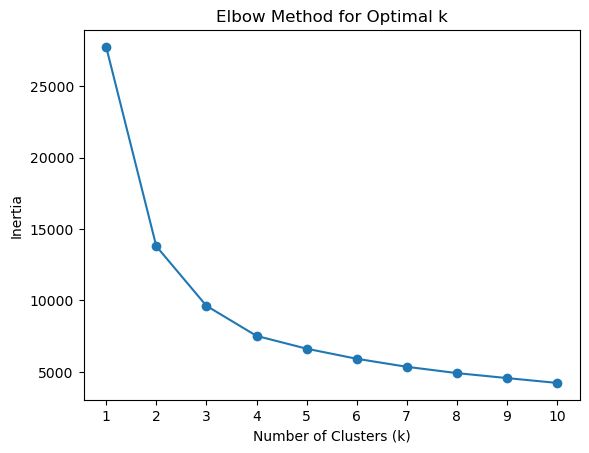

In [34]:
inertia_values = []
k_values = range(1, 11)  # Specify the range of k values to try

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(PCA_ds)  # Fit KMeans to the data
    inertia_values.append(kmeans.inertia_)  # Append the inertia value to the list

# Plotting the elbow curve
plt.plot(k_values, inertia_values, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.show()

From the above graph, we decide the number of clusters to be 4, as the intertia begins decreasing at a slower rate from that point onwards.


### Fitting the data to clusters

The data is fitted using the Agglomerative Cluster model, with the number of clusters set as 4.


In [35]:
# Fit the model and predict clusters
AC = AgglomerativeClustering(n_clusters=4)
AC_clusters = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = AC_clusters
data["Clusters"] = AC_clusters


### Plotting the clusters

Data is plotted with 3-dimensional grid to visualise the distribution of clusters. Each color represesnts one "cluster"


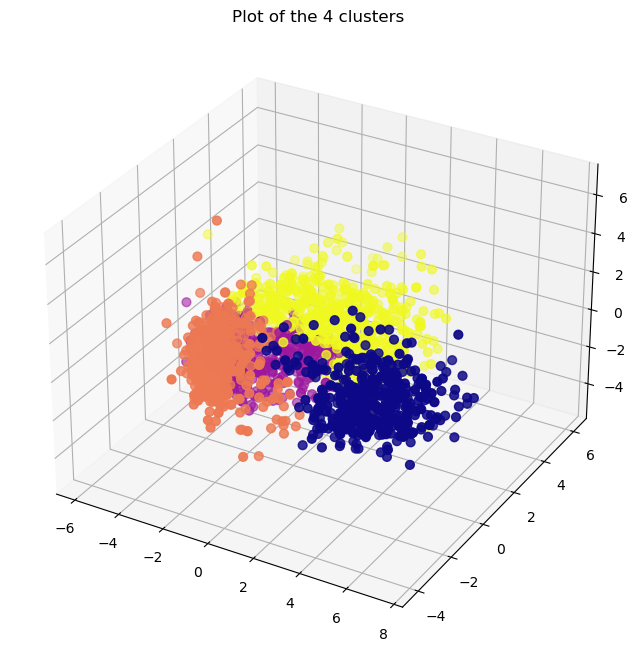

In [40]:
# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection="3d")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker="o", cmap="plasma_r")
ax.set_title("Plot of the 4 clusters")
plt.show()